In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew 
%matplotlib inline

In [2]:
train = pd.read_csv('/Users/feihuyan/Downloads/house/train.csv')
test = pd.read_csv('/Users/feihuyan/Downloads/house/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [52]:
print(f'train: {train.shape[0]} instances and {train.shape[1]} features')
print(f'test: {test.shape[0]} instances and {test.shape[1]} features')

train: 1460 instances and 81 features
test: 1459 instances and 80 features


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Text(0.5, 1.0, 'Sale Price Distribution')

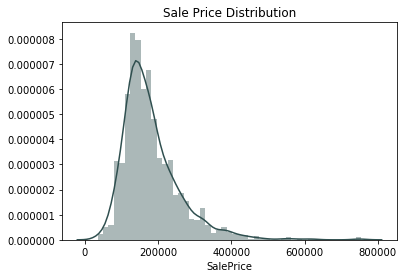

In [5]:
print(train['SalePrice'].describe())
sns.distplot(train['SalePrice'],color='darkslategray').set_title('Sale Price Distribution')

In [6]:
Skew=train['SalePrice'].skew()
Kurt=train['SalePrice'].kurt()
print(f'Training data has {Skew} skew')
print(f'Training data has {Kurt} skew')

Training data has 1.8828757597682129 skew
Training data has 6.536281860064529 skew


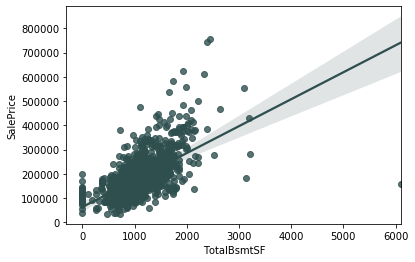

In [7]:
sns.regplot(train['TotalBsmtSF'], train['SalePrice'],color='darkslategray')

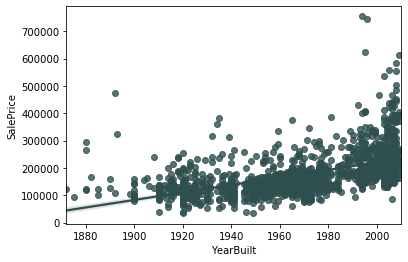

In [8]:
sns.regplot(train['YearBuilt'], train['SalePrice'],color='darkslategray')

Text(0.5, 1.0, 'Year built vs Price Distribution')

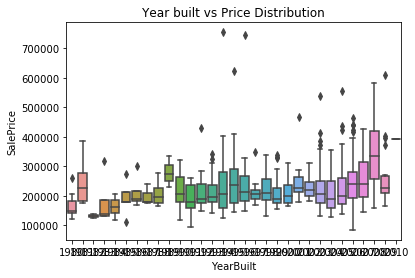

In [48]:
train1 = train[train['YearBuilt']>= 1980]
sns.boxplot(train1['YearBuilt'], y=train1["SalePrice"]).set_title('Year built vs Price Distribution')

Text(0.5, 1.0, 'Overall Quality vs Price Distribution')

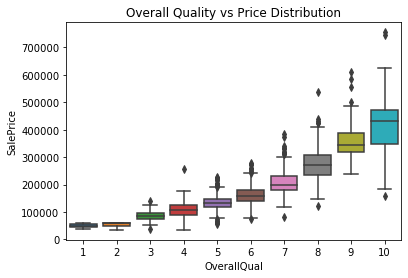

In [47]:
sns.boxplot(x=train['OverallQual'], y=train["SalePrice"]).set_title('Overall Quality vs Price Distribution')

Text(0.5, 1.0, 'BedroomAbvGr vs Sale Price')

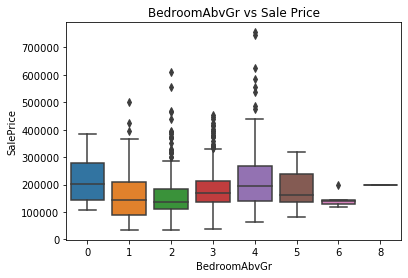

In [13]:
sns.boxplot(x=train['BedroomAbvGr'],y=train['SalePrice']).set_title('BedroomAbvGr vs Sale Price')

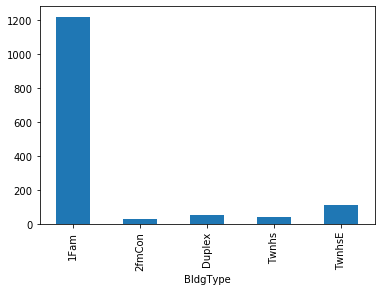

In [50]:
train.groupby('BldgType')['Id'].count().plot(kind='bar')

Text(0.5, 1.0, 'BedroomAbvGr vs Sale Price')

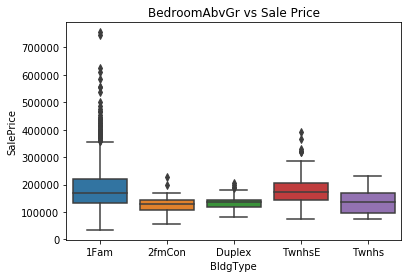

In [49]:
sns.boxplot(x=train['BldgType'],y=train['SalePrice']).set_title('BedroomAbvGr vs Sale Price')

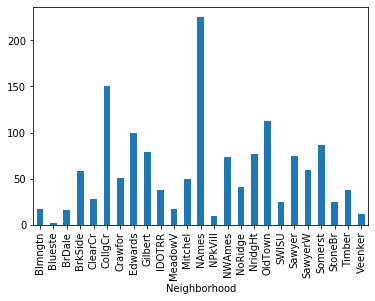

In [36]:
train.groupby('Neighborhood')['Id'].count().plot(kind='bar')

In [41]:
neighbor = train.groupby('Neighborhood')['Id'].count().sort_values(ascending=False)[:10]
neighbor.index

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert',
       'NridgHt', 'Sawyer', 'NWAmes', 'SawyerW'],
      dtype='object', name='Neighborhood')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

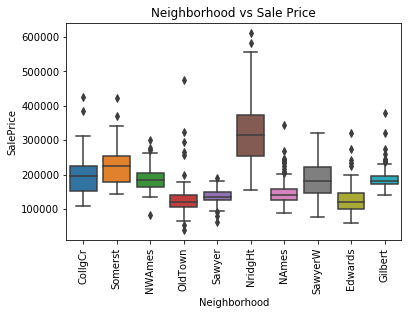

In [46]:
n_neighbor = train.loc[train['Neighborhood'].isin(neighbor.index)]
sns.boxplot(x=n_neighbor['Neighborhood'],y=n_neighbor['SalePrice']).set_title('Neighborhood vs Sale Price')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Missing Data')

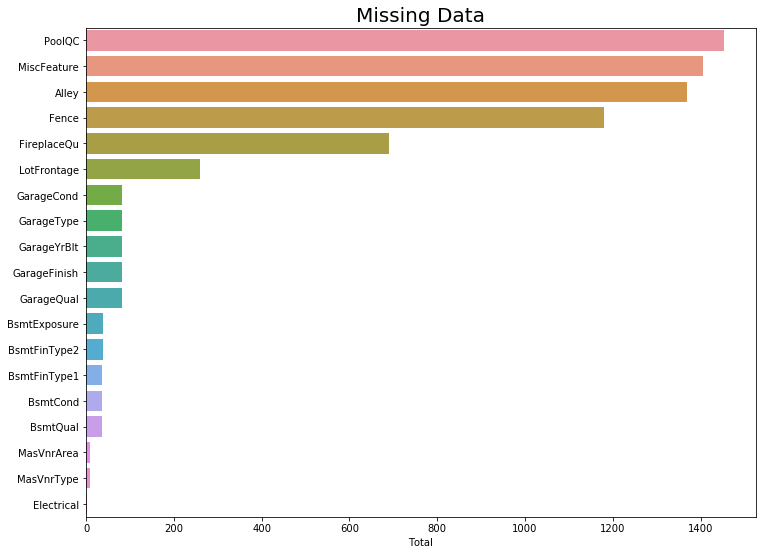

In [14]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
mi = pd.DataFrame(missing_data['Total'][:19])
plt.figure(figsize=(12,9))
sns.barplot(x=mi['Total'], y=mi.index).set_title('Missing Data', fontsize=20)

In [91]:
y_train = pd.DataFrame(train['SalePrice'])
df = pd.concat((train, test), sort=False).reset_index(drop=True)
df.drop(['SalePrice'], axis=1, inplace=True)
df.drop(['Id'], axis=1, inplace=True)

In [92]:
def data_cleaning(df):
    df['MSSubClass'] = df['MSSubClass'].apply(str)
    df['YrSold'] = df['YrSold'].astype(str)
    df['MoSold'] = df['MoSold'].astype(str)
    df['MasVnrArea']=df['MasVnrArea'].fillna(0)
    df['Functional'] = df['Functional'].fillna('Typ') 
    df['Electrical'] = df['Electrical'].fillna("SBrkr") 
    df['KitchenQual'] = df['KitchenQual'].fillna("TA") 
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0]) 
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    cols=df.columns
    for col in cols:
        if df[col].dtype == "object":
            df[col] = df[col].fillna("None")
    for col in cols:
        if df[col].dtype != "object":
            df[col]= df[col].fillna(0)

In [93]:
data_cleaning(df)

In [94]:
df.drop(['MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1,inplace=True)

In [95]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SaleCondition,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [76]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,None,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,None,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,None,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,None,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,None,NaN,NaN,0,12,2008,WD,Normal


In [96]:
def data_eng(df):   
    df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
    df['TotalSF']=df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] +
                                     df['1stFlrSF'] + df['2ndFlrSF'])
    df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) +
                                   df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
    df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
                                  df['EnclosedPorch'] + df['ScreenPorch'] +
                                  df['WoodDeckSF'])
    df['haspool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['has2ndfloor'] = df['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    df['hasgarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['hasbsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['hasfireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [97]:
data_eng(df)

In [99]:
split=train.shape[0]

In [100]:
df_1 = pd.get_dummies(df)
train_df = df_1[:split]
test_df = df_1[split:]

In [101]:
train_df=train_df[(train_df['GrLivArea'] < 4600) & (train_df['MasVnrArea'] < 1500)]

In [102]:
target=train[['SalePrice']]
i = [1298,523, 297]
target.drop(target.index[i], inplace=True)
target["SalePrice"] = np.log1p(target["SalePrice"])

/Users/feihuyan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/feihuyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [104]:
from sklearn.model_selection import KFold, cross_val_score
y=np.array(target)
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=train_df):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [119]:
y

array([[12.24769912],
       [12.10901644],
       [12.31717117],
       ...,
       [12.49313327],
       [11.86446927],
       [11.90159023]])

In [109]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [110]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=[14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5], cv=kfolds))
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007], cv=kfolds, l1_ratio=[0.8, 0.85, 0.9, 0.95, 0.99, 1]))                                
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008], random_state=42, cv=kfolds))
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [111]:
gbr = GradientBoostingRegressor(n_estimators=3000, 
                                learning_rate=0.07, 
                                max_depth=5, 
                                max_features='sqrt', 
                                min_samples_leaf=15, 
                                min_samples_split=10, 
                                loss='huber', 
                                random_state =42)

In [124]:
lightgbm = LGBMRegressor(objective='regression', 
                           num_leaves=5,
                           learning_rate=0.02, 
                           n_estimators=5000,
                           max_bin=200, 
                           bagging_fraction=0.75,
                           bagging_freq=5, 
                           bagging_seed=7,
                           feature_fraction=0.2,
                           feature_fraction_seed=7,
                           verbose=-1,)

In [113]:
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, svr),
                                meta_regressor=lightgbm,
                                use_features_in_secondary=True)

In [116]:
from datetime import datetime 
import warnings
warnings.filterwarnings('ignore')

In [117]:
score = cv_rmse(ridge , train_df)
score = cv_rmse(lasso , train_df)
score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

elastic net: 0.1112 (0.0151)
 2020-07-31 17:28:33.165494
SVR: 0.1786 (0.0163)
 2020-07-31 17:28:41.386414
lightgbm: nan (nan)
 2020-07-31 17:28:41.570150
gbr: 0.1169 (0.0137)
 2020-07-31 17:30:12.933355


In [120]:
stack_gen_m = stack_gen.fit(np.array(train_df), np.array(y))
elastic_model = elasticnet.fit(train_df, y)
lasso_model = lasso.fit(train_df, y)
ridge_model = ridge.fit(train_df, y)
svr_model = svr.fit(train_df, y)
gbr_model = gbr.fit(train_df, y)

In [175]:
def blend_models_predict(X):
    return ((0.1 * np.array(elastic_model.predict(X))) + 
            (0.05 * np.array(lasso_model.predict(X))) + 
            (0.2 * np.array(ridge_model.predict(X))) + 
            (0.2 * np.array(svr_model.predict(X))) +
            (0.15 * np.array(gbr_model.predict(X))) + 
            (0.3 * np.array(stack_gen_m.predict(np.array(X)))))

In [176]:
pd.DataFrame(blend_models_predict(train_df))

,0,1,2,3,4,5,6,7,8,9,...,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456
0,12.237650,12.147311,12.280368,11.964414,12.461962,11.963706,12.506721,12.237863,11.860732,11.800230,...,11.882050,12.437824,11.912408,11.719474,12.162703,12.107679,12.232032,12.447217,11.921651,11.974754
1,12.231125,12.140787,12.273843,11.957890,12.455438,11.957182,12.500196,12.231339,11.854207,11.793705,...,11.875526,12.431300,11.905884,11.712949,12.156179,12.101155,12.225507,12.440692,11.915126,11.968230
2,12.246191,12.155852,12.288909,11.972955,12.470503,11.972247,12.515262,12.246404,11.869273,11.808771,...,11.890591,12.446365,11.920949,11.728015,12.171244,12.116220,12.240573,12.455758,11.930192,11.983295
3,12.194330,12.103992,12.237048,11.921094,12.418642,11.920387,12.463401,12.194543,11.817412,11.756910,...,11.838731,12.394504,11.869089,11.676154,12.119384,12.064360,12.188712,12.403897,11.878331,11.931435
4,12.302004,12.211666,12.344722,12.028768,12.526316,12.028061,12.571075,12.302217,11.925086,11.864584,...,11.946405,12.502178,11.976763,11.783828,12.227058,12.172034,12.296386,12.511571,11.986005,12.039109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,12.208709,12.118370,12.251426,11.935473,12.433021,11.934765,12.477779,12.208922,11.831791,11.771289,...,11.853109,12.408883,11.883467,11.690532,12.133762,12.078738,12.203091,12.418276,11.892710,11.945813
1453,12.245226,12.154887,12.287944,11.971990,12.469538,11.971282,12.514297,12.245439,11.868308,11.807806,...,11.889627,12.445400,11.919985,11.727050,12.170279,12.115256,12.239608,12.454793,11.929227,11.982331
1454,12.289187,12.198849,12.331905,12.015952,12.513500,12.015244,12.558258,12.289401,11.912269,11.851767,...,11.933588,12.489362,11.963946,11.771011,12.214241,12.159217,12.283569,12.498754,11.973188,12.026292
1455,12.164856,12.074517,12.207574,11.891620,12.389168,11.890912,12.433927,12.165069,11.787938,11.727436,...,11.809256,12.365030,11.839614,11.646679,12.089909,12.034885,12.159238,12.374423,11.848857,11.901960


In [187]:
x1=0.15 * np.array(elastic_model.predict(train_df))
x2=0.15 * np.array(lasso_model.predict(train_df))
x3=0.2 * np.array(ridge_model.predict(train_df))
x4=0.2 * np.array(svr_model.predict(train_df))
x5=0.15 * np.array(gbr_model.predict(train_df))
x6=0.15 * np.array(stack_gen_m.predict(np.array(train_df)))

In [189]:
x3 = np.squeeze(np.asarray(x3))

In [190]:
f=x1+x2+x3+x4+x5+x6

In [191]:
pd.DataFrame(f)

,0
0,12.236401
1,12.153570
2,12.285513
3,11.940617
4,12.529307
...,...
1452,12.080827
1453,12.250021
1454,12.485052
1455,11.848744


In [192]:
print('RMSLE score on train data:')
print(rmsle(y, f))

RMSLE score on train data:
0.0714803267238685
